Import Libraries

In [173]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
import pylab as pl

Use pandas to read loan_data.csv as dataframe called loans

In [174]:
loans = pd.read_csv('C:\\Users\\hp\\Desktop\\Data Science\\PROJECTS\\Logistic Reg--Decison Tree--KNN\\loan_data.csv')

Check out the info(), head() and describe() methods on loans.

In [175]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [176]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [177]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Exploratory Data Analysis

Create a histogram of two FICO distributions on top of eachother, one for each credit.policy outcome.

Text(0.5, 0, 'FICO')

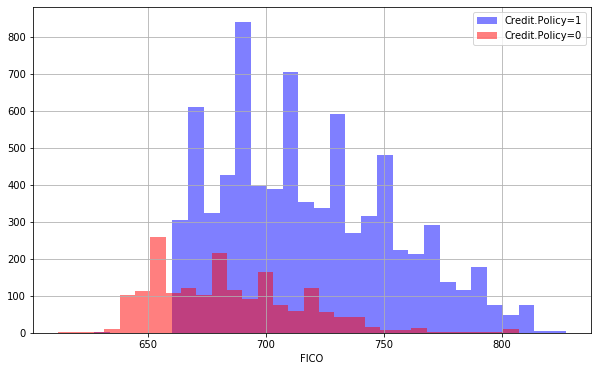

In [178]:
pl.figure(figsize=(10, 6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',                                           
bins=30,label='Credit.Policy=1')

loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',                                              
bins=30,label='Credit.Policy=0')

pl.legend()
pl.xlabel('FICO')

Create a similar figure, except this time select by the not.fully.paid column

Text(0.5, 0, 'FICO')

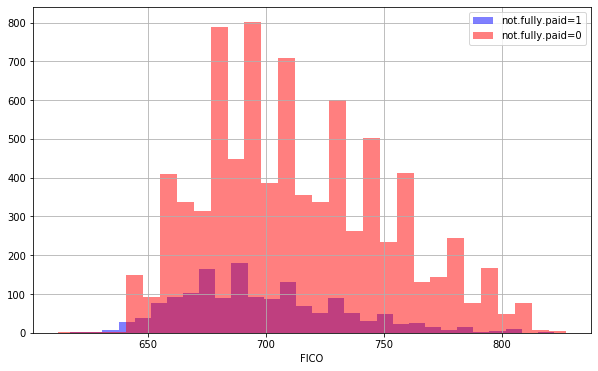

In [179]:
pl.figure(figsize=(10, 6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',                                           
bins=30,label='not.fully.paid=1')

loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',                                              
bins=30,label='not.fully.paid=0')

pl.legend()
pl.xlabel('FICO')

Create a countplot using seaborn showing the count of loans by purpose, with the color hue defined by not.fully.paid.

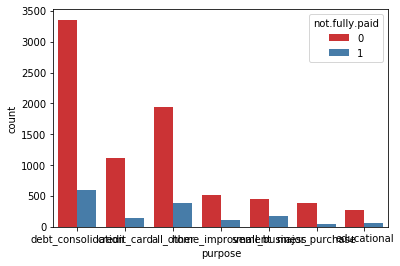

In [180]:
sns.countplot(data=loans, x='purpose', hue='not.fully.paid', palette='Set1')

Let's see the trend between FICO score and interest rate using jointplot.

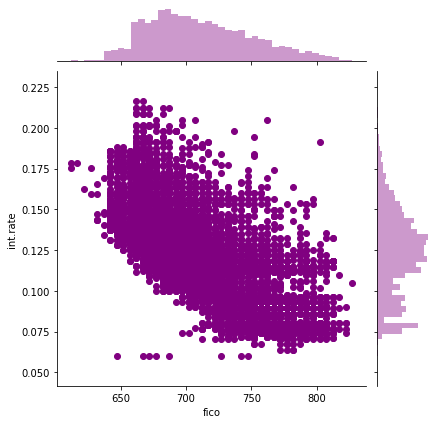

In [181]:
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')

Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy

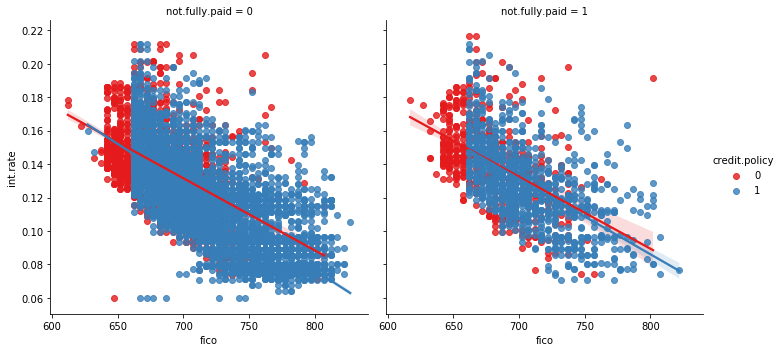

In [182]:
sns.lmplot(y='int.rate', x='fico', data=loans, hue='credit.policy', col='not.fully.paid', palette='Set1')

Setting up the Data

Check loans.info() again.

In [183]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Categorical Features

Create a list of the column names that have the categorical features.
Call this list cat_feats.

In [184]:
cat_feats=['inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'credit.policy', 'purpose']

Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data

In [185]:
final_data=pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [186]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   int.rate                    9578 non-null   float64
 1   installment                 9578 non-null   float64
 2   log.annual.inc              9578 non-null   float64
 3   dti                         9578 non-null   float64
 4   fico                        9578 non-null   int64  
 5   days.with.cr.line           9578 non-null   float64
 6   revol.bal                   9578 non-null   int64  
 7   revol.util                  9578 non-null   float64
 8   not.fully.paid              9578 non-null   int64  
 9   inq.last.6mths_1            9578 non-null   uint8  
 10  inq.last.6mths_2            9578 non-null   uint8  
 11  inq.last.6mths_3            9578 non-null   uint8  
 12  inq.last.6mths_4            9578 non-null   uint8  
 13  inq.last.6mths_5            9578 

Train Test Split
Use sklearn to split your data into a training set and a testing set.

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
x=final_data.drop('not.fully.paid',axis=1)
y=final_data['not.fully.paid']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

Training a  Decision Tree Model

Import DecisionTreeClassifier

In [189]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [190]:
dtree = DecisionTreeClassifier()

In [191]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Predictions and Evaluation of Decision Tree

Create predictions from the test set and create a classification report and a confusion matrix.

In [192]:
predict = dtree.predict(x_test)

In [193]:
from sklearn.metrics import confusion_matrix, classification_report

In [194]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.16      0.19      0.17       443

    accuracy                           0.72      2874
   macro avg       0.50      0.50      0.50      2874
weighted avg       0.74      0.72      0.73      2874



In [195]:
print(confusion_matrix(y_test, predict))

[[1987  444]
 [ 358   85]]


Training the Random Forest model

Create an instance of the RandomForesClassifier class fit it to our training data.

In [196]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
rfc = RandomForestClassifier(n_estimators=600)

In [198]:
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Predictions and Evaluation

Predict the class of not.fully.paid for the x_test data.

In [199]:
predict_rfc = rfc.predict(x_test)

Now create a classification report from the results. Do you get anything strange or some sort of warning?

In [200]:
print(classification_report(y_test, predict_rfc))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.56      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.70      0.50      0.47      2874
weighted avg       0.80      0.85      0.78      2874



No.

Show the Confusion Matrix for the predictions.

In [201]:
print(confusion_matrix(y_test, predict_rfc))

[[2427    4]
 [ 438    5]]
